In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy
from sklearn.linear_model import LogisticRegression
import tkinter as tk

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/datasets_diabetes .csv', delimiter=',')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


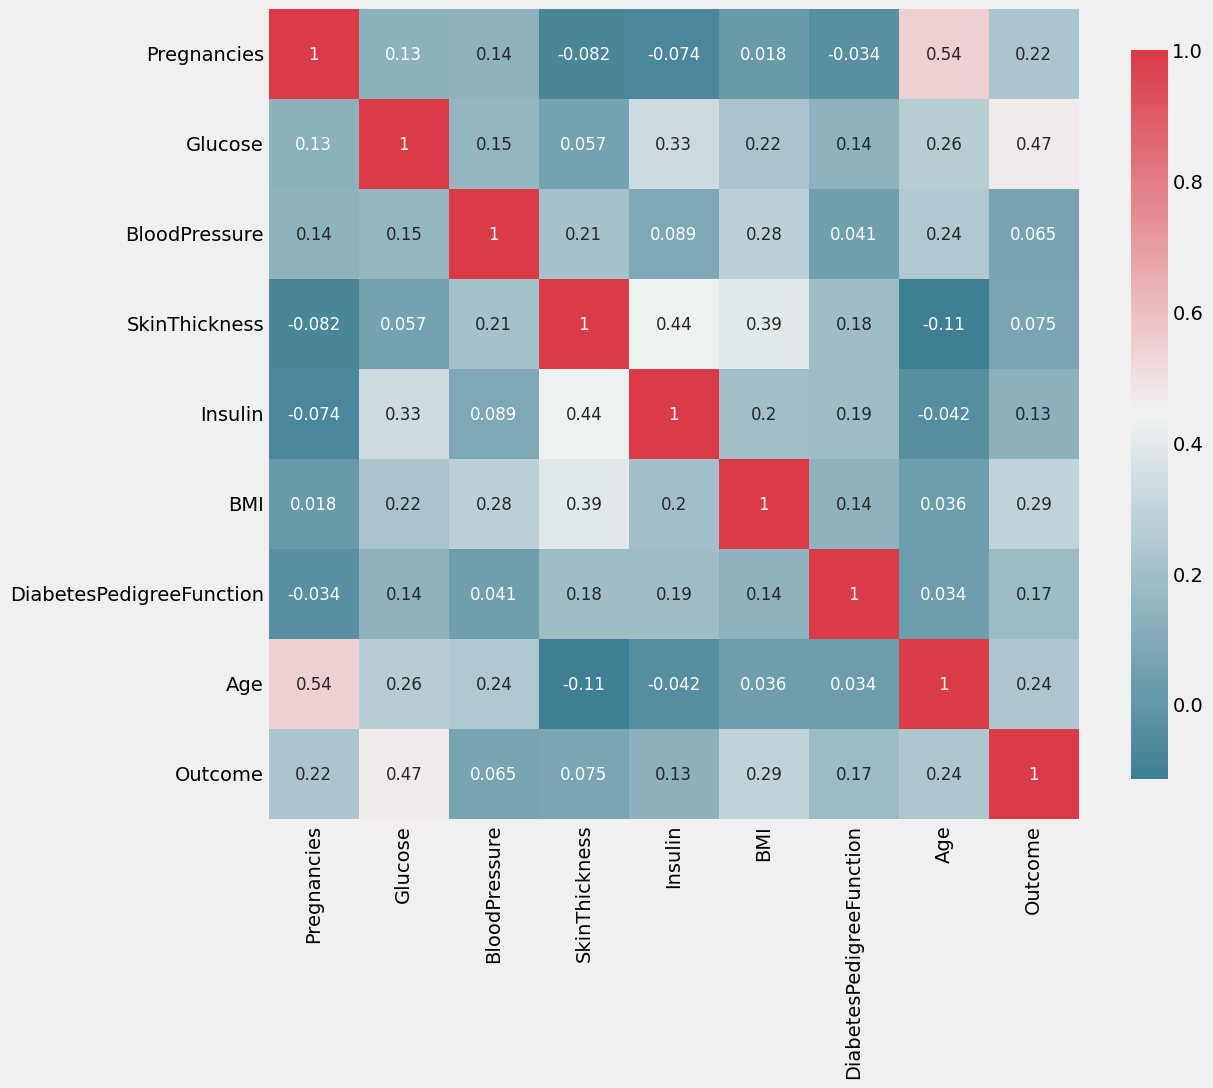

In [ ]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr,

        cmap = cmap,

        square=True,

        cbar_kws={ 'shrink' : .9 },

        ax=ax,

        annot = True,

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map( data )

In [ ]:
x=data[["Age","BMI","Glucose"]]
y=data["Outcome"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=30)

In [ ]:
clf=RandomForestClassifier()  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.7857142857142857


In [ ]:

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance

print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))
print(x_test)

Accuracy=0.78
     Age   BMI  Glucose
226   26  35.7      101
610   24  30.9      106
505   38  33.3       75
470   28  41.3      144
474   24  28.9      114
..   ...   ...      ...
245   49  30.0      184
486   21  40.7      139
533   31  29.8       91
220   21  34.6      177
106   27  22.4       96

[154 rows x 3 columns]


In [ ]:
d = {'Age': [26], 'BMI': [35.7], 'Glucose': [ 101]} #plug-in the values


In [ ]:
df= pd.DataFrame(data=d)
print(df)
print(logreg.predict(df))

   Age   BMI  Glucose
0   26  35.7      101
[0]
